In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
train=pd.read_csv('train.csv',encoding='ISO-8859-1')
test=pd.read_csv('test.csv')
addresses=pd.read_csv('addresses.csv')
latlons=pd.read_csv('latlons.csv')

C:\Users\miluo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [5]:
train.compliance.mean()

0.07253565173880411

In [6]:
train.compliance.isnull().mean()

0.36126181553778175

In [14]:
train_sub=train[np.logical_not(train.compliance.isnull())]

In [31]:
train_sub.dtypes

ticket_id                       int64
agency_name                    object
inspector_name                 object
violator_name                  object
violation_street_number       float64
violation_street_name          object
violation_zip_code            float64
mailing_address_str_number    float64
mailing_address_str_name       object
city                           object
state                          object
zip_code                       object
non_us_str_code                object
country                        object
ticket_issued_date             object
hearing_date                   object
violation_code                 object
violation_description          object
disposition                    object
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amount               float64
payment_amou

In [32]:
train_sub.ticket_issued_date=pd.to_datetime(train_sub.ticket_issued_date)
train_sub.hearing_date=pd.to_datetime(train_sub.hearing_date)

C:\Users\miluo\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
train_sub.dtypes

ticket_id                              int64
agency_name                           object
inspector_name                        object
violator_name                         object
violation_street_number              float64
violation_street_name                 object
violation_zip_code                   float64
mailing_address_str_number           float64
mailing_address_str_name              object
city                                  object
state                                 object
zip_code                              object
non_us_str_code                       object
country                               object
ticket_issued_date            datetime64[ns]
hearing_date                  datetime64[ns]
violation_code                        object
violation_description                 object
disposition                           object
fine_amount                          float64
admin_fee                            float64
state_fee                            float64
late_fee  

In [35]:
latlons.shape

(121769, 3)

In [40]:
addresses.columns

Index(['ticket_id', 'address'], dtype='object')

In [42]:
addresses.head()

,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


In [38]:
train_sub.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [37]:
latlons.columns

Index(['address', 'lat', 'lon'], dtype='object')

In [43]:
train_sub.shape

(159880, 34)

In [45]:
train_sub2=train_sub.merge(addresses,how='left',left_on='ticket_id',right_on='ticket_id')

In [48]:
train_sub3=train_sub2.merge(latlons,how='left',left_on='address',right_on='address')

In [50]:
train_sub3.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance', 'address', 'lat',
       'lon'],
      dtype='object')

In [55]:
train_sub3.drop(['violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country'],axis=1,inplace=True)

In [58]:
train_sub3.drop(['payment_amount', 'balance_due',\
                'payment_date', 'payment_status', 'collection_status'],axis=1,inplace=True)

In [61]:
train_sub3.apply(lambda x:np.mean(x.isnull()))

ticket_id                0.000000
agency_name              0.000000
inspector_name           0.000000
violator_name            0.000163
ticket_issued_date       0.000000
hearing_date             0.001420
violation_code           0.000000
violation_description    0.000000
disposition              0.000000
fine_amount              0.000000
admin_fee                0.000000
state_fee                0.000000
late_fee                 0.000000
discount_amount          0.000000
clean_up_cost            0.000000
judgment_amount          0.000000
grafitti_status          1.000000
compliance_detail        0.000000
compliance               0.000000
address                  0.000000
lat                      0.000013
lon                      0.000013
dtype: float64

In [62]:
train_sub3.drop('grafitti_status',axis=1,inplace=True)

In [63]:
train_sub3

,ticket_id,agency_name,inspector_name,violator_name,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,...,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,...,10.0,25.0,0.0,0.0,305.0,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,...,10.0,75.0,0.0,0.0,855.0,compliant by late payment within 1 month,1.0,"4311 central, Detroit MI",42.326937,-83.135118
2,22046,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",2004-05-01 11:50:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,...,10.0,25.0,0.0,0.0,305.0,non-compliant by no payment,0.0,"6478 northfield, Detroit MI",42.145257,-83.208233
3,18738,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Deerwood Development Group Inc, Deer",2004-06-14 14:15:00,2005-02-22 15:00:00,61-63.0500,Failed To Secure Permit For Lawful Use Of Land,Responsible by Default,750.0,...,10.0,75.0,0.0,0.0,855.0,non-compliant by no payment,0.0,"8027 brentwood, Detroit MI",42.433466,-83.023493
4,18735,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",2004-06-16 12:30:00,2005-02-22 15:00:00,61-63.0100,Noncompliance/Grant Condition/BZA/BSE,Responsible by Default,100.0,...,10.0,10.0,0.0,0.0,140.0,non-compliant by no payment,0.0,"8228 mt elliott, Detroit MI",42.388641,-83.037858
5,18733,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",2004-06-16 12:25:00,2005-02-22 15:00:00,61-63.0100,Noncompliance/Grant Condition/BZA/BSE,Responsible by Default,100.0,...,10.0,10.0,0.0,0.0,140.0,non-compliant by no payment,0.0,"8228 mt elliott, Detroit MI",42.388641,-83.037858
6,28204,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Inc, Nanno",2004-07-12 13:30:00,2005-05-31 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Default,750.0,...,10.0,75.0,0.0,0.0,855.0,non-compliant by no payment,0.0,"15307 seven mile, Detroit MI",42.435773,-82.963348
7,18743,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Gardner Resale, GAR",2004-07-28 12:15:00,2005-02-22 15:00:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Default,750.0,...,10.0,75.0,0.0,0.0,855.0,non-compliant by no payment,0.0,"9100 van dyke, Detroit MI",42.395765,-83.022333
8,18741,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Hardaway, Kevin",2004-08-05 15:00:00,2005-02-22 15:00:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Default,750.0,...,10.0,75.0,0.0,0.0,855.0,non-compliant by no payment,0.0,"20024 schaefer, Detroit MI",42.440190,-83.180488
9,18978,"Buildings, Safety Engineering & Env Department","Williams, Darrin","TLC Hand Car Wash, a/k/a",2004-08-23 14:15:00,2005-02-28 15:00:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Default,750.0,...,10.0,75.0,0.0,0.0,855.0,non-compliant by no payment,0.0,"9425 van dyke, Detroit MI",42.399222,-83.023161


In [64]:
train_sub3.drop(['compliance_detail'],axis=1,inplace=True)

,ticket_id,agency_name,inspector_name,violator_name,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,1.0,"4311 central, Detroit MI",42.326937,-83.135118
2,22046,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",2004-05-01 11:50:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,"6478 northfield, Detroit MI",42.145257,-83.208233
3,18738,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Deerwood Development Group Inc, Deer",2004-06-14 14:15:00,2005-02-22 15:00:00,61-63.0500,Failed To Secure Permit For Lawful Use Of Land,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0.0,"8027 brentwood, Detroit MI",42.433466,-83.023493
4,18735,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",2004-06-16 12:30:00,2005-02-22 15:00:00,61-63.0100,Noncompliance/Grant Condition/BZA/BSE,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0.0,"8228 mt elliott, Detroit MI",42.388641,-83.037858


In [87]:
tmp=train_sub3.groupby('violator_name').agg({'compliance':np.mean,'ticket_id':len}).sort_values('ticket_id')

In [90]:
tmp.rename(columns={'ticket_id':'count'},inplace=True)

In [96]:
freq_violators=tmp[tmp['count']>2].index

In [102]:
def freq_violation(n):
    freq_vio=tmp[tmp['count']>=n].index
    return np.mean(train_sub3[train_sub3.violator_name.isin(freq_vio)]['compliance'])

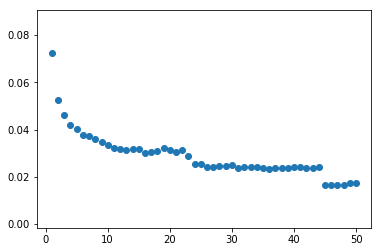

In [103]:
compliance_list=[]
for i in range(1,51):
    compliance_list.append(freq_violation(i))
plt.scatter(np.arange(1,51),compliance_list)

#### It looks that frequent offenders have a lower tendency to pay

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler=MinMaxScaler()

In [121]:
location=train_sub3.loc[:,['lat','lon']].fillna(method='ffill').astype('float')

In [122]:
location=scaler.fit_transform(location)

(0.5, 0.9)

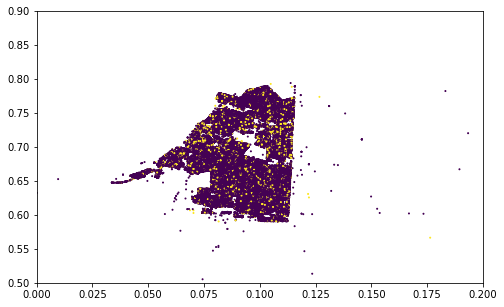

In [133]:
plt.figure(figsize=(8,5))
plt.scatter(location[:,0],location[:,1],s=1,c=train_sub3.compliance)
plt.xlim(0,0.2);
plt.ylim(0.5,0.9);